<a href="https://colab.research.google.com/github/Shaikh-Ruman/Python/blob/main/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
available_datasets = sns.get_dataset_names()
print(available_datasets)

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [ ]:
#Load dataset and show frist 10 rows
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = sns.load_dataset('penguins')
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,Female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,Male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [ ]:
#No. of rows and columns
data.shape

(344, 7)

In [ ]:
#datatypes
data.dtypes

,0
species,object
island,object
bill_length_mm,float64
bill_depth_mm,float64
flipper_length_mm,float64
body_mass_g,float64
sex,object


In [ ]:
#Null values
data.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [4]:
#No. of species, islands, sexes
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

data = sns.load_dataset('penguins')

data = data.dropna(subset=["species", "island", "sex"])
num_species = data["species"].nunique()
num_islands = data["island"].nunique()
num_sexes = data["sex"].nunique()

print(f"Number of species: {num_species}")
print(f"Number of islands: {num_islands}")
print(f"Number of sexes: {num_sexes}")

Number of species: 3
Number of islands: 3
Number of sexes: 2


In [9]:
#Mean, median, std
import numpy as np

data = data.dropna(subset=["bill_length_mm", "flipper_length_mm"])

stats = data[["bill_length_mm", "flipper_length_mm"]].agg(["mean", "median", "std"])
print(stats)


        bill_length_mm  flipper_length_mm
mean         43.992793         200.966967
median       44.500000         197.000000
std           5.468668          14.015765


In [10]:
#Average body mass across species
data = data.dropna(subset=["body_mass_g"])
avg_body_mass = data.groupby("species")["body_mass_g"].mean()

print("Average body mass across species:")
print(avg_body_mass)

Average body mass across species:
species
Adelie       3706.164384
Chinstrap    3733.088235
Gentoo       5092.436975
Name: body_mass_g, dtype: float64


In [11]:
#Species having the longest average bill length
data = data.dropna(subset=["bill_length_mm"])
avg_bill_length = data.groupby("species")["bill_length_mm"].mean()

longest_bill_species = avg_bill_length.idxmax()
longest_bill_value = avg_bill_length.max()

print("Average bill length by species:")
print(avg_bill_length)
print("\nSpecies with the longest average bill length:")
print(f"{longest_bill_species} ({longest_bill_value:.2f} mm)")


Average bill length by species:
species
Adelie       38.823973
Chinstrap    48.833824
Gentoo       47.568067
Name: bill_length_mm, dtype: float64

Species with the longest average bill length:
Chinstrap (48.83 mm)


In [12]:
#Islands having the highest Penguins
penguins = data.dropna(subset=["body_mass_g"])

avg_body_mass_island = data.groupby("island")["body_mass_g"].mean()

heaviest_island = avg_body_mass_island.idxmax()
heaviest_mass = avg_body_mass_island.max()

print("Average body mass by island:")
print(avg_body_mass_island)
print("\nIsland with the heaviest penguins:")
print(f"{heaviest_island} ({heaviest_mass:.2f} g)")

Average body mass by island:
island
Biscoe       4719.171779
Dream        3718.902439
Torgersen    3708.510638
Name: body_mass_g, dtype: float64

Island with the heaviest penguins:
Biscoe (4719.17 g)


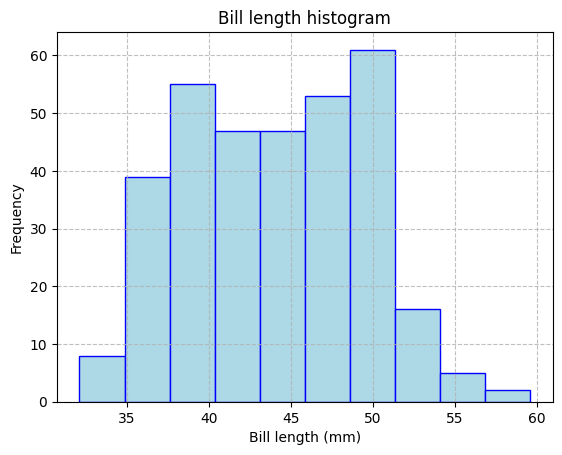

In [13]:
#Histogram
plt.hist(data['bill_length_mm'], bins=10, color='lightblue',edgecolor='blue')
plt.title("Bill length histogram")
plt.xlabel("Bill length (mm)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--',alpha=0.8)
plt.show()

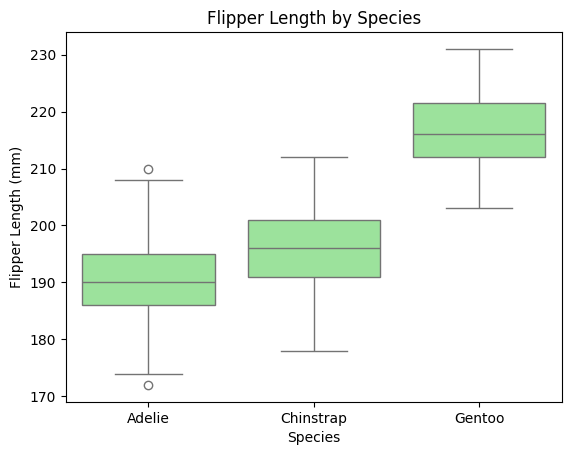

In [15]:
#Boxplot
sns.boxplot(x="species", y="flipper_length_mm", data=data, color="lightgreen")

plt.title("Flipper Length by Species")
plt.xlabel("Species")
plt.ylabel("Flipper Length (mm)")
plt.show()

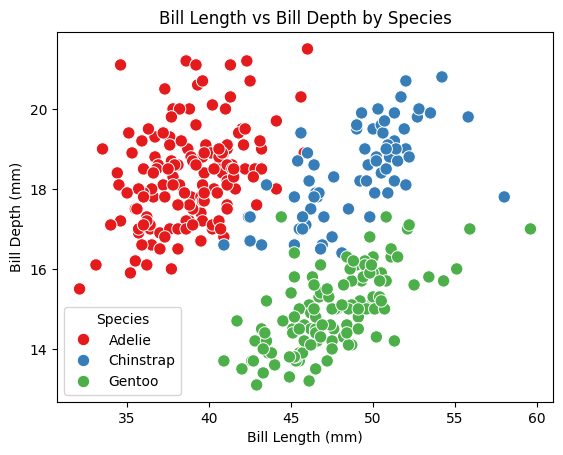

In [17]:
#Scatter plot
sns.scatterplot(x="bill_length_mm",y="bill_depth_mm",hue="species",data=data,palette="Set1", s=80)
plt.title("Bill Length vs Bill Depth by Species")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend(title="Species")
plt.show()

Correlation Matrix:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653096   
bill_depth_mm           -0.228626       1.000000          -0.577792   
flipper_length_mm        0.653096      -0.577792           1.000000   
body_mass_g              0.589451      -0.472016           0.872979   

                   body_mass_g  
bill_length_mm        0.589451  
bill_depth_mm        -0.472016  
flipper_length_mm     0.872979  
body_mass_g           1.000000  


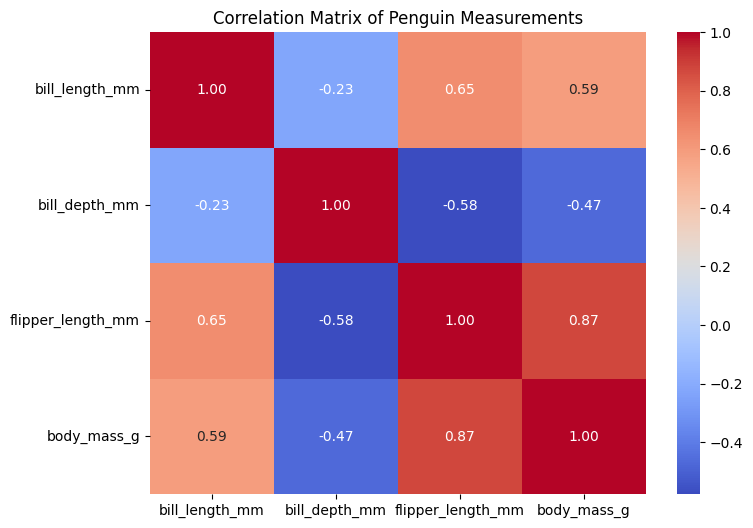

In [20]:
#Correlation matrix
numeric_data = data.select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_data.corr()

print("Correlation Matrix:")
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

plt.title("Correlation Matrix of Penguin Measurements")
plt.show()